<h1 align='center'><b>Machine Learning Algorithms for Classification</b></h1>
<p align='center'><img src=https://estatsite.com.br/wp-content/uploads/2021/06/programming-code-coding-or-hacker-background-programming-code-icon-made-with-binary-code-digital-binary-data-and-streaming-digital-code-vector-1200x675.jpg heigth='350' width='600'></p>

<p align='justify'>N√≥s faremos uso de 2 (dois) dos primeiros algoritmos de aprendizado de m√°quina descritos por algoritmos para classifica√ß√£o: o perceptron e os neur√¥nios lineares adaptativos. Vamos implementar um perceptron passo a passo em Python e trein√°-lo para classificar diferentes esp√©cies de flores no conjunto de dados Iris, muito famoso por sinal. Isso nos ajudar√° a entender o conceito de algoritmos de aprendizado de m√°quina para classifica√ß√£o e como eles podem ser implementados com efici√™ncia em Python.</p>


<h2>Aplica√ß√µes</h2>

In [8]:
# Padronizando as bibliotecas usadas e as vers√µes
%watermark -a "Willian Pina" -u -d -p numpy,pandas,matplotlib

Author: Willian Pina

Last updated: 2022-04-10

numpy     : 1.21.5
pandas    : 1.2.5
matplotlib: 3.5.1



In [9]:
# Implementando um perceptron em Python
import numpy as np


class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

<p align='justify'>Usando esta implementa√ß√£o do <i>Perceptron</i>, agora podemos inicializar novos Perceptron objetos com uma determinada taxa de aprendizado, <i>eta</i>, e o n√∫mero de <i>epoch</i>, <i>n_iter</i> (passa sobre o conjunto de dados de treinamento).</p>

<h4>Treinando um modelo <i>Perceptron</i> no conjunto de dados Iris</h4>
<p align='justify'>Consideraremos apenas duas classes de flores, Setosa e Versicolor, do conjunto de dados Iris por raz√µes pr√°ticas, lembrando que o <i>perceptron</i> √© um classificador bin√°rio. No entanto, o algoritmo <i>perceptron</i> pode ser estendido para classifica√ß√£o multiclasse ‚Äî por exemplo, a t√©cnica One vs All (OvA) - Um contra Todos.</p>

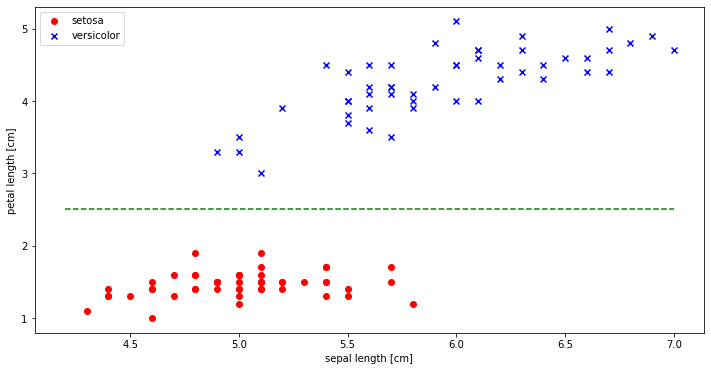

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregando os dados
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None, encoding='utf-8')

# Selecionando setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Extraindo sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# Plotando os dados
plt.figure(figsize=(12,6))
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.hlines(y= 2.5, xmin=4.2, xmax=7, colors='g', linestyles='--')
plt.legend(loc='upper left')

plt.show()

<p align='justify'>O gr√°fico de dispers√£o anterior mostra a distribui√ß√£o de exemplos de flores no conjunto de dados Iris ao longo dos dois eixos de recursos: comprimento da p√©tala e comprimento da s√©pala (medido em cent√≠metros). Neste subespa√ßo de caracter√≠sticas bidimensionais, podemos ver que h√° um limite de decis√£o linear que deve ser suficiente para separar as flores Setosa das flores Versicolor. Assim, um classificador linear como o perceptron deve ser capaz de classificar perfeitamente as flores neste conjunto de dados.</p>

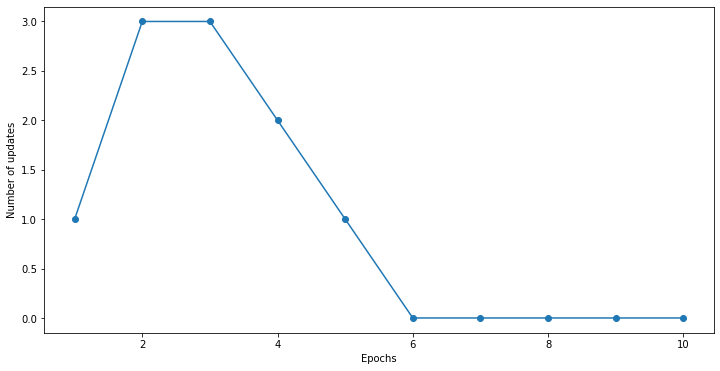

In [18]:
# Treinando o modelo Perceptron

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.figure(figsize=(12,6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [32]:
# Plotando as Regi√µes de Decis√£o (Fun√ß√£o)
from matplotlib.colors import ListedColormap

# Definindo a Fun√ß√£o
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

C:\Users\willi\AppData\Local\Temp\ipykernel_7904\3134332590.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


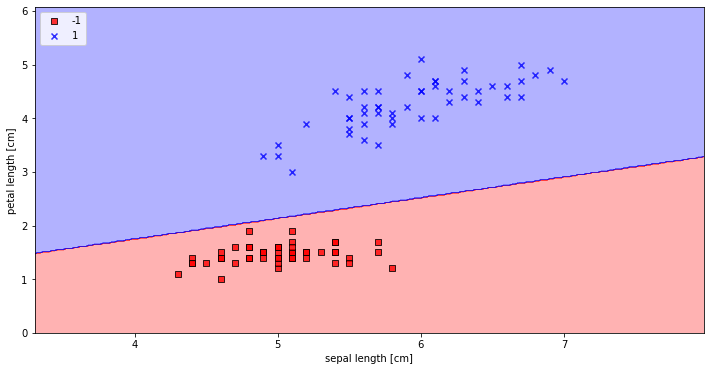

In [37]:
# Plotando os resultados
plt.figure(figsize=(12,6))
plot_decision_regions(X, y, classifier=ppn)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

<p align='justify'>Como podemos ver no gr√°fico, o perceptron aprendeu um limite de decis√£o que √© capaz de classificar perfeitamente todos os exemplos de flores no subconjunto de treinamento Iris.</p>
<p align='justify'>O pesquisador <i><b>Sebastian Raschka</b></i> chama a aten√ß√£o no seguinte aspecto, embora o perceptron classifique perfeitamente as duas classes de flores Iris, a converg√™ncia √© um dos maiores problemas do perceptron. <i>Rosenblatt</i> provou matematicamente que a regra de aprendizagem perceptron converge se as duas classes podem ser separadas por um hiperplano linear. No entanto, se as classes n√£o puderem ser separadas perfeitamente por tal limite de decis√£o linear, os pesos nunca parar√£o de atualizar, a menos que definamos um n√∫mero m√°ximo de √©pocas.</p>

<h4>Neur√¥nios lineares adaptativos e a converg√™ncia da aprendizagem (<i>Adaline</i>)</h4>
<p align='justify'>O algoritmo <i>Adaline</i> √© particularmente interessante porque ilustra os principais conceitos de defini√ß√£o e minimiza√ß√£o das fun√ß√µes de custo cont√≠nuo. Isso estabelece as bases para a compreens√£o de algoritmos de aprendizado de m√°quina mais avan√ßados para classifica√ß√£o, como regress√£o log√≠stica, m√°quinas de vetor de suporte (SVM) e modelos de regress√£o.</p>

In [39]:
# Implementando o Adaline
class AdalineGD(object):
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
  
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

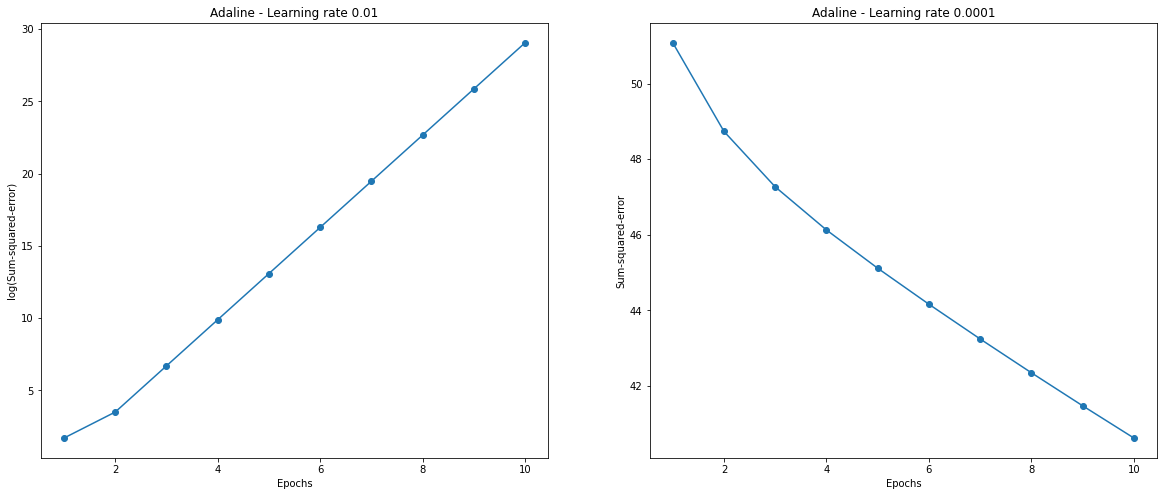

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# eta = taxa de aprendizado (learning rate)
#Treinando um modelo com tx 0.01
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

#Treinando um modelo com tx 0.00001
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')


plt.show()

<p align='justify'>Como podemos ver nos gr√°ficos de fun√ß√£o de custo resultantes, encontramos dois tipos diferentes de problemas. O gr√°fico √† esquerda mostra o que pode acontecer se escolhermos uma taxa de aprendizado muito grande. Em vez de minimizar a fun√ß√£o de custo, o erro se torna maior a cada √©poca, porque ultrapassamos o m√≠nimo global. Por outro lado, podemos ver que o custo diminui no gr√°fico √† direita, mas a taxa de aprendizado escolhida, ùúÇùúÇ = 0,0001 , √© t√£o pequena que o algoritmo exigiria um n√∫mero muito grande de √©pocas para convergir para o custo m√≠nimo global.</p>

<h4>Melhorando o <i>Gradient Descent</i> por meio do dimensionamento de recursos</h4>
<p align='justify'>O <i>Gradient Descent</i> √© um dos muitos algoritmos que se beneficiam do dimensionamento de recursos. Usaremos um m√©todo de dimensionamento de recursos chamado padroniza√ß√£o (<i>Standardization</i>), que fornece aos nossos dados as propriedades de uma distribui√ß√£o normal padr√£o: m√©dia zero e vari√¢ncia unit√°ria. Esse procedimento de normaliza√ß√£o ajuda o aprendizado do <i>Gradient Descent</i> a convergir mais r√°pido; no entanto, ele n√£o torna o conjunto de dados original normalmente distribu√≠do. A padroniza√ß√£o desloca a m√©dia de cada recurso para que seja centralizado em zero e cada recurso tenha um desvio padr√£o de 1 (vari√¢ncia unit√°ria).</p>

<p align='justify'>Uma das raz√µes pelas quais a padroniza√ß√£o ajuda no aprendizado do <i>Gradient Descent</i> √© que o otimizador precisa passar por menos etapas para encontrar uma solu√ß√£o boa ou √≥tima (o custo m√≠nimo global).</p>


C:\Users\willi\AppData\Local\Temp\ipykernel_7904\3134332590.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


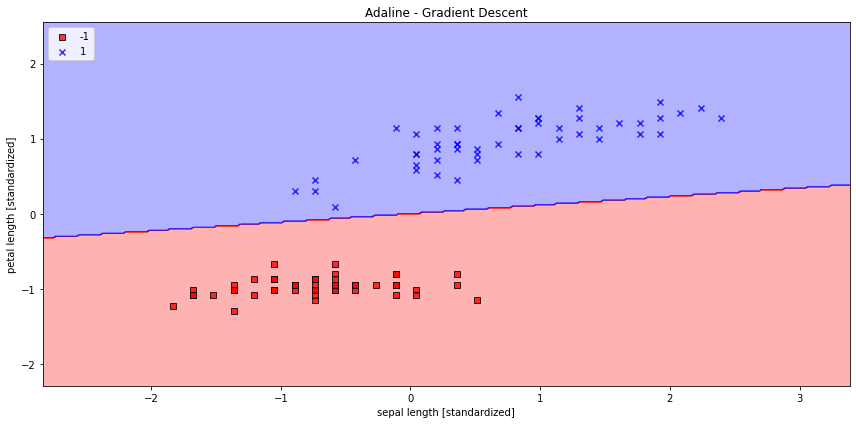

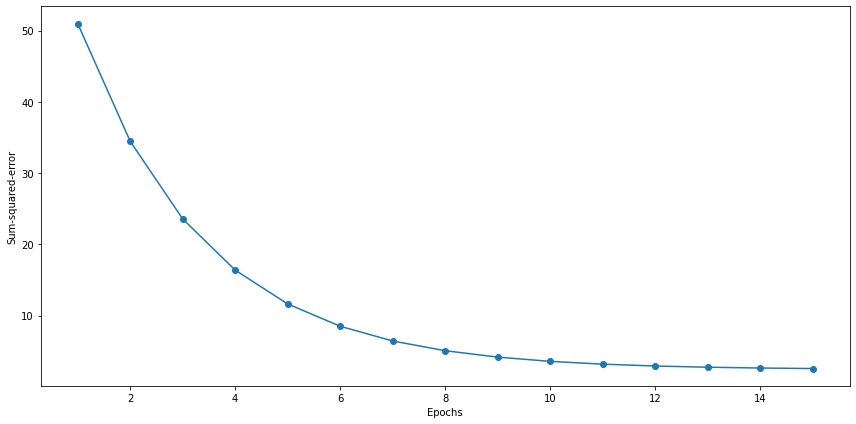

In [47]:
# Padronizando as Features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# Treinando o modelo
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y) # Aplicando as Features j√° padronizadas (Standard)

plt.figure(figsize=(12,6))
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

plt.figure(figsize=(12,6))
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()

plt.show()

<p align='justify'>Como podemos ver nos gr√°ficos, Adaline agora convergiu ap√≥s o treinamento nos recursos padronizados usando uma taxa de aprendizado de ùúÇùúÇ = 0,01 . No entanto, observe que o SSE permanece diferente de zero, embora todos os exemplos de flores tenham sido classificados corretamente.</p>

<h4>Aprendizado de m√°quina em larga escala e o <i>Gradient Descent</i> estoc√°stico</h4>
<p align='justify'>Anteriomente, aprendemos como minimizar uma fun√ß√£o de custo dando um passo na dire√ß√£o oposta de um gradiente de custo que √© calculado a partir de todo o conjunto de dados de treinamento; √© por isso que essa abordagem √†s vezes tamb√©m √© chamada de <i>Gradient Descent</i> em lote. Agora imagine que temos um conjunto de dados muito grande com milh√µes de dados, o que n√£o √© incomum em muitos aplica√ß√µes de aprendizado de m√°quina. Executar o <i>Gradient Descent</i> em lote pode ser computacionalmente bastante caro neste cen√°rio, pois precisamos reavaliar todo o conjunto de dados de treinamento toda vez que damos um passo em dire√ß√£o ao m√≠nimo global. Uma alternativa popular para o algoritmo <i>Gradient Descent</i> em lote √© o <i>Gradient Descent</i> estoc√°stico (SGD), que √†s vezes tamb√©m √© chamada de <i>Gradient Descent</i> iterativa ou online. Em vez de atualizar os pesos com base na soma dos erros acumulados em todos os exemplos de treinamento, n√≥s atualizamos os pesos de forma incremental para cada exemplo de treinamento.</p>
<p align='justify'>Embora o SGD possa ser considerado como uma aproxima√ß√£o do <i>Gradient Descent</i>, ele normalmente atinge a converg√™ncia muito mais rapidamente devido √†s atualiza√ß√µes de peso mais frequentes. Como cada gradiente √© calculado com base em um √∫nico exemplo de treinamento, a superf√≠cie de erro √© mais ruidosa do que no <i>Gradient Descent</i>, o que tamb√©m pode ter a vantagem de que o SGD pode escapar de m√≠nimos locais rasos mais facilmente se estivermos trabalhando com fun√ß√µes de custo n√£o lineares.</p>

<p align='justify'>Outra vantagem do SGD √© que podemos us√°-lo para aprendizado online. No aprendizado online, nosso modelo √© treinado dinamicamente √† medida que novos dados de treinamento chegam. Isso √© especialmente √∫til se estivermos acumulando grandes quantidades de dados, por exemplo, dados de clientes em aplicativos da web. Usando o aprendizado online, o sistema pode se adaptar imediatamente √†s mudan√ßas e os dados de treinamento podem ser descartados ap√≥s a atualiza√ß√£o do modelo se o espa√ßo de armazenamento for um problema.</p>


In [48]:
# Criando o Algoritmo
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

C:\Users\willi\AppData\Local\Temp\ipykernel_7904\3134332590.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


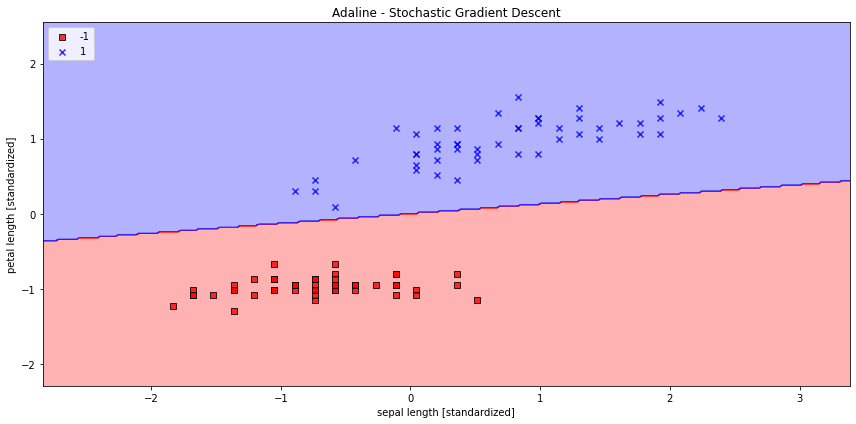

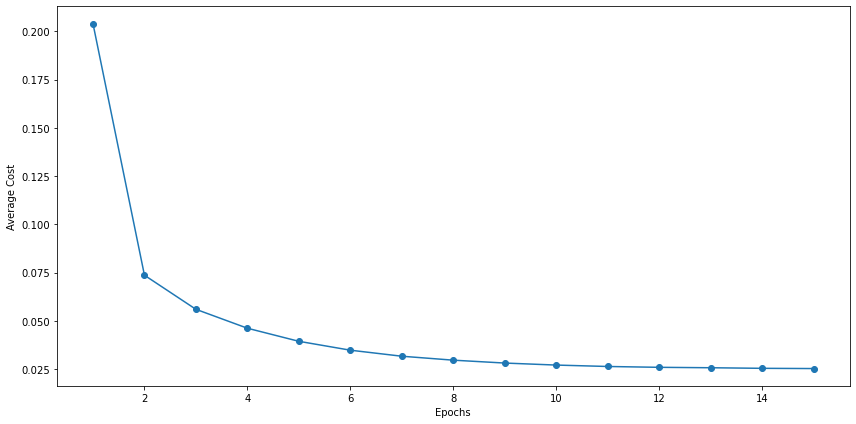

In [49]:
# Instanciando o algoritmo com tx Aprendizagem 0.01
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)

# Treinando o algoritmo AdaSGD
ada_sgd.fit(X_std, y)

# Plotando as regi√µes de decis√£o
plt.figure(figsize=(12,6))
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

plt.figure(figsize=(12,6))
plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()

plt.show()

<p align='justify'>Como voc√™ pode ver, o custo m√©dio cai muito rapidamente e o limite de decis√£o final ap√≥s 15 √©pocas parece semelhante ao <i>Gradient Descent</i> de lote <i>Adaline</i>.</p>